# Gaussian Blur, Medical Images

In [1]:
repo='cvnd-exercises'
sub_dir='1_2_Convolutional_Filters_Edge_Detection'
url='https://github.com/linked0/' + repo + '.git'
!mkdir $repo
%cd $repo
!git init
!git remote add -f origin $url
!git config core.sparsecheckout true
!echo $sub_dir >> .git/info/sparse-checkout
!git pull --recurse-submodules origin master
%cd $sub_dir
!ls


mkdir: cannot create directory ‘cvnd-exercises’: File exists
/content/cvnd-exercises
Reinitialized existing Git repository in /content/cvnd-exercises/.git/
fatal: remote origin already exists.
remote: Counting objects: 4, done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/linked0/cvnd-exercises
 * branch            master     -> FETCH_HEAD
   0eff6bb..db5e15f  master     -> origin/master
Updating 0eff6bb..db5e15f
Fast-forward
 .../2. Finding Edges and Custom Kernels.ipynb      | 446 ++++++++++++++-------
 1 file changed, 310 insertions(+), 136 deletions(-)
/content/cvnd-exercises/1_2_Convolutional_Filters_Edge_Detection
1. Fourier Transform.ipynb
2. Finding Edges and Custom Kernels.ipynb
3. Gaussian Blur.ipynb
4. Fourier Transform of Filters.ipynb
5. Canny Edge Detection.ipynb
6_1. Hough lines.ipynb
6_2. Hough circles, agriculture.ipynb
7. Haar Cascade, Face Detec

### Import resources and display image

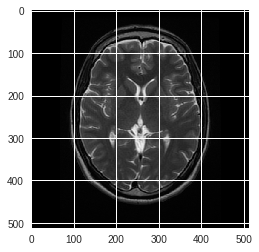

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/brain_MR.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.grid = False
plt.imshow(image_copy)


### Gaussian blur the image

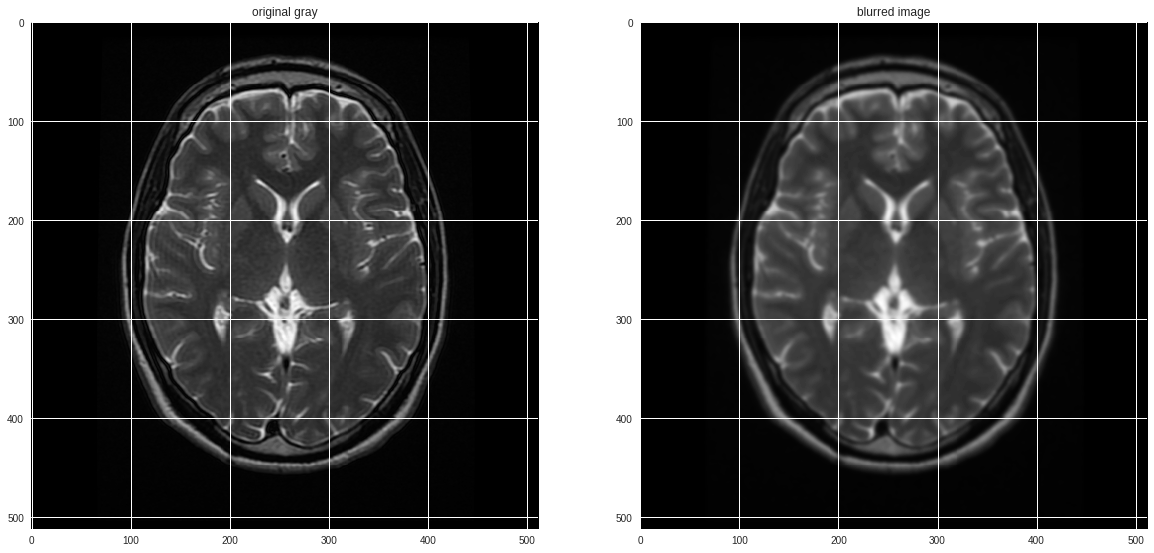

In [8]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

### Test performance with a high-pass filter

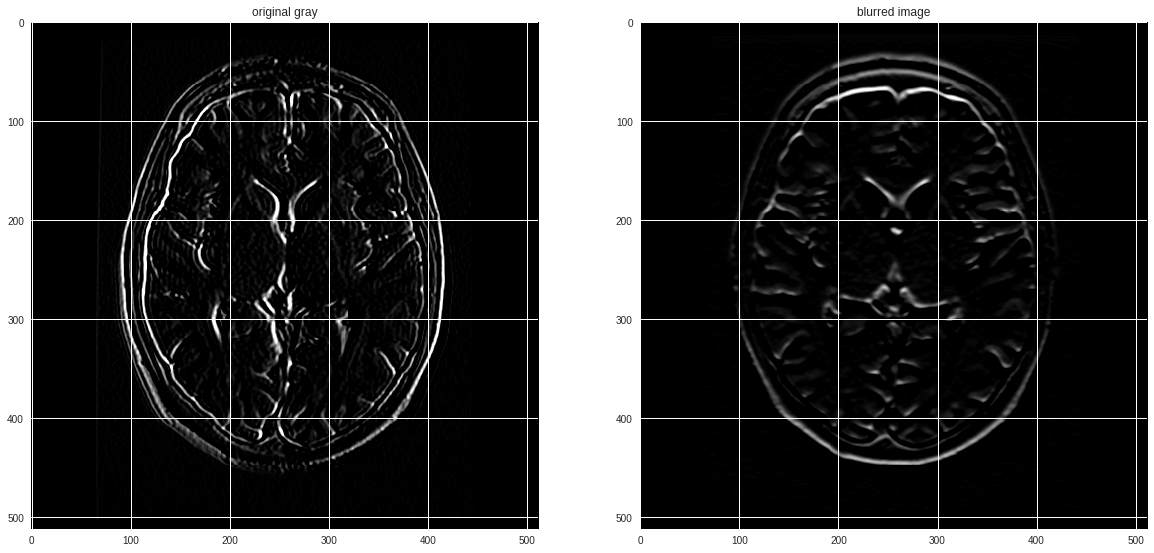

In [9]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

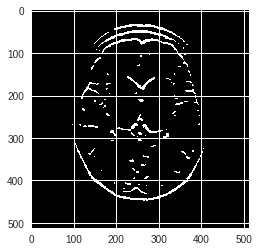

In [10]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
